<a href="https://colab.research.google.com/github/BeyondKitchen/fnb-pnl-analysis-2025/blob/main/F%26B_PnL_Analysis_2025_Actuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Imports and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/fnb_pnl_actuals_clean_2025.csv"

df = pd.read_csv(file_path)
df.head()


,Account,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
0,Food Sales,"115,415","123,260","143,404","160,359","143,187","146,588","146,909","157,777","142,090","167,018"
1,Non-Alcoholic Bev. Sales,"18,434","19,875","21,778","21,058","18,589","13,683","15,340","16,490","13,503","16,250"
2,Liquor Sales,"199,538","200,393","240,244","237,401","170,912","170,668","163,813","206,789","189,430","252,255"
3,Beer Sales,"134,984","153,427","177,963","183,807","143,339","134,840","119,730","157,178","146,738","193,367"
4,Wine Sales,"33,841","32,412","37,792","32,557","32,167","30,783","27,146","33,065","38,086","36,818"


In [ ]:
# Cell 2: Basic cleanup and type conversion

# Strip spaces from account names
df["Account"] = df["Account"].astype(str).str.strip()

# All columns except 'Account' are monthly values
months = df.columns[1:]
print("Month columns:", list(months))

# Convert monthly columns to numeric
for col in months:
    series = (
        df[col]
        .astype(str)
        .str.replace(",", "", regex=False)   # remove thousand separators
        .str.strip()
        .replace({"-": "0", "": "0"})       # treat "-" and empty as zero
    )
    df[col] = pd.to_numeric(series, errors="coerce").fillna(0)

df.info()


Month columns: ['Jan-25', 'Feb-25', 'Mar-25', 'Apr-25', 'May-25', 'Jun-25', 'Jul-25', 'Aug-25', 'Sep-25', 'Oct-25']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Account  63 non-null     object 
 1   Jan-25   63 non-null     float64
 2   Feb-25   63 non-null     float64
 3   Mar-25   63 non-null     float64
 4   Apr-25   63 non-null     float64
 5   May-25   63 non-null     float64
 6   Jun-25   63 non-null     float64
 7   Jul-25   63 non-null     float64
 8   Aug-25   63 non-null     float64
 9   Sep-25   63 non-null     float64
 10  Oct-25   63 non-null     float64
dtypes: float64(10), object(1)
memory usage: 5.5+ KB


In [ ]:
# Cell 3: Define account groups based on business rules

# Revenue
revenue_accounts = [
    "Food Sales",
    "Non-Alcoholic Bev. Sales",
    "Liquor Sales",
    "Beer Sales",
    "Wine Sales",
    "Retail Sales",
    "Tobacco Sales",
    "Other Revenue",
    "Revenue Complimentary",
]

# COGS
cogs_accounts = [
    "Food Cost",
    "Non-alcoholic Beverage Cost",
    "Liquor Cost",
    "Beer Cost",
    "Wine Cost",
    "F&B Rebates",
    "Spillage / Waste",
    "Papergoods",
    "Tobacco",
]

# Salaries & Benefits
salaries_accounts = [
    "Salaries",
    "Overtime",
    "Statutory Holiday Worked",
    "Vacation",
    "Statutory Holiday",
    "Bonus",
    "Union Backpay Accrual",
    "Employer Health Tax Expense",
    "Extended Health Insurance Expense",
    "Workers Compensation",
    "Employer Match - Pension",
    "Employer Match - RRSP",
    "CPP Expense",
    "EI Expense",
    "Misc. Emp Benefits",
]

# Promotional allowances
promo_accounts = [
    "Food Promo Discounts",
    "Employee Comps - Meals and Entertain (Internal)",
]

# Marketing & Sales
marketing_accounts = [
    "Complimentary Amenities",
    "Player Comps - Meals - HL - Contra",
]

# Professional fees
professional_accounts = [
    "Fees",
    "Research & Development",
]

# Property & Administration
property_accounts = [
    "Licenses & Permits",
    "Equipment Rental",
    "Cleaning Supplies",
    "Replacements Supplies - China/Glass/Ctlry",
    "Paper and Plastic Disposables Supplies",
    "Supplies",
    "Laundry & Dry Cleaning",
    "Telephone",
    "Dues & Subscriptions",
    "Repairs and Maintenance",
    "Bank Charges",
    "Cash (Overages)/Shortages",
]


In [ ]:
# Cell 4: Calculate group totals

def monthly_sum_for(df, accounts, months):
    """Return monthly sum for a list of accounts."""
    mask = df["Account"].isin(accounts)
    return df.loc[mask, months].sum()

total_revenues = monthly_sum_for(df, revenue_accounts, months)
total_cogs = monthly_sum_for(df, cogs_accounts, months)

salaries_total = monthly_sum_for(df, salaries_accounts, months)
promo_total = monthly_sum_for(df, promo_accounts, months)
marketing_total = monthly_sum_for(df, marketing_accounts, months)
professional_total = monthly_sum_for(df, professional_accounts, months)
property_total = monthly_sum_for(df, property_accounts, months)

operating_total = promo_total + marketing_total + professional_total + property_total
dept_expenses_total = operating_total + salaries_total

total_revenues


,0
Jan-25,581509.0
Feb-25,605934.0
Mar-25,716470.0
Apr-25,717159.0
May-25,583194.0
Jun-25,574974.0
Jul-25,546221.0
Aug-25,665430.0
Sep-25,596896.0
Oct-25,726709.0


In [ ]:
# Cell 5: Build a summary table for key P&L blocks

summary_index = [
    "Total Revenues",
    "Total COGS",
    "Salaries and Benefits, Total",
    "Promotional allowances, Total",
    "Marketing and Sales, Total",
    "Professional Fees, Total",
    "Property and Administration, Total",
    "Total Operating Expenses",
    "Total Departmental Expenses",
]

summary_values = np.vstack([
    total_revenues.values,
    total_cogs.values,
    salaries_total.values,
    promo_total.values,
    marketing_total.values,
    professional_total.values,
    property_total.values,
    operating_total.values,
    dept_expenses_total.values,
])

summary = pd.DataFrame(summary_values, index=summary_index, columns=months)
summary


,Jan-25,Feb-25,Mar-25,Apr-25,May-25,Jun-25,Jul-25,Aug-25,Sep-25,Oct-25
Total Revenues,581509.0,605934.0,716470.0,717159.0,583194.0,574974.0,546221.0,665430.0,596896.0,726709.0
Total COGS,159397.0,171537.0,189206.0,174018.0,152773.0,110548.0,130119.0,174470.0,150367.0,192946.0
"Salaries and Benefits, Total",290911.0,275820.0,281957.0,304812.0,296902.0,284717.0,297101.0,295885.0,303471.0,333403.0
"Promotional allowances, Total",13095.0,14936.0,16846.0,23493.0,25604.0,56416.0,25165.0,21860.0,21258.0,23639.0
"Marketing and Sales, Total",-12353.0,-11915.0,-12002.0,-11771.0,-12183.0,-12183.0,-11948.0,-11834.0,-12013.0,-12360.0
"Professional Fees, Total",234.0,63.0,214.0,196.0,197.0,201.0,202.0,202.0,207.0,212.0
"Property and Administration, Total",34650.0,31668.0,31084.0,25357.0,31270.0,27756.0,28764.0,53307.0,54367.0,72777.0
Total Operating Expenses,35626.0,34752.0,36142.0,37275.0,44888.0,72190.0,42183.0,63535.0,63819.0,84268.0
Total Departmental Expenses,326537.0,310572.0,318099.0,342087.0,341790.0,356907.0,339284.0,359420.0,367290.0,417671.0


In [ ]:
# Cell 6: Quick sanity check against original total rows

def get_total_row(label):
    row = df.loc[df["Account"] == label, months]
    if row.empty:
        return None
    return row.iloc[0]

check_items = {
    "Total Revenues": total_revenues,
    "Total COGS": total_cogs,
    "Salaries and Benefits, Total": salaries_total,
    "Promotional allowances, Total": promo_total,
    "Marketing and Sales, Total": marketing_total,
    "Professional Fees, Total": professional_total,
    "Property and Administration, Total": property_total,
    "Total Operating Expenses": operating_total,
    "Total Departmental Expenses": dept_expenses_total,
}

validation_rows = []
for label, calc_series in check_items.items():
    existing = get_total_row(label)
    if existing is None:
        continue

    diff = calc_series - existing
    validation_rows.append({
        "Label": label,
        "Max abs diff": diff.abs().max()
    })

validation_df = pd.DataFrame(validation_rows)
validation_df


,Label,Max abs diff
0,Total Revenues,1.0
1,Total COGS,1.0
2,"Salaries and Benefits, Total",1.0
3,"Promotional allowances, Total",1.0
4,"Marketing and Sales, Total",1.0
5,"Professional Fees, Total",0.0
6,"Property and Administration, Total",3.0
7,Total Operating Expenses,3.0
8,Total Departmental Expenses,2.0


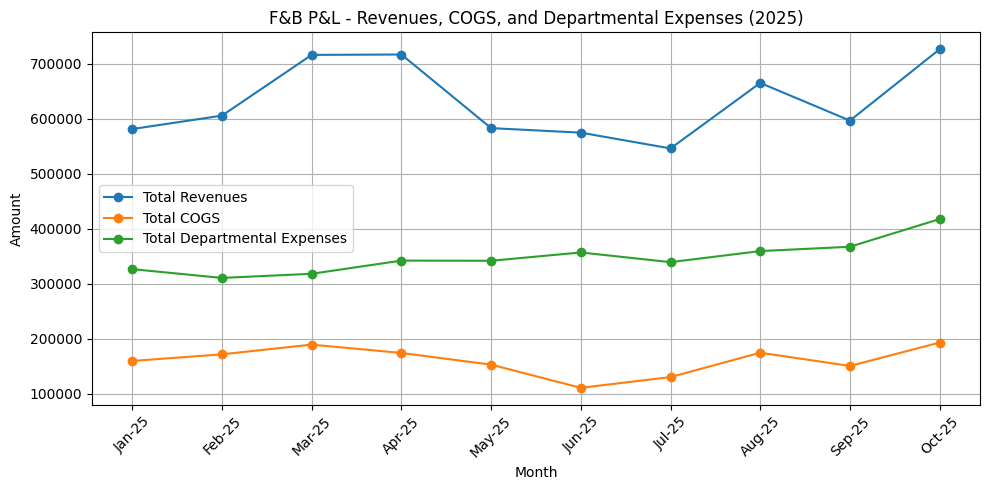

In [ ]:
# Cell 7: Simple revenue vs expenses trend

plt.figure(figsize=(10, 5))

plt.plot(months, total_revenues.values, marker="o", label="Total Revenues")
plt.plot(months, total_cogs.values, marker="o", label="Total COGS")
plt.plot(months, dept_expenses_total.values, marker="o", label="Total Departmental Expenses")

plt.title("F&B P&L - Revenues, COGS, and Departmental Expenses (2025)")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


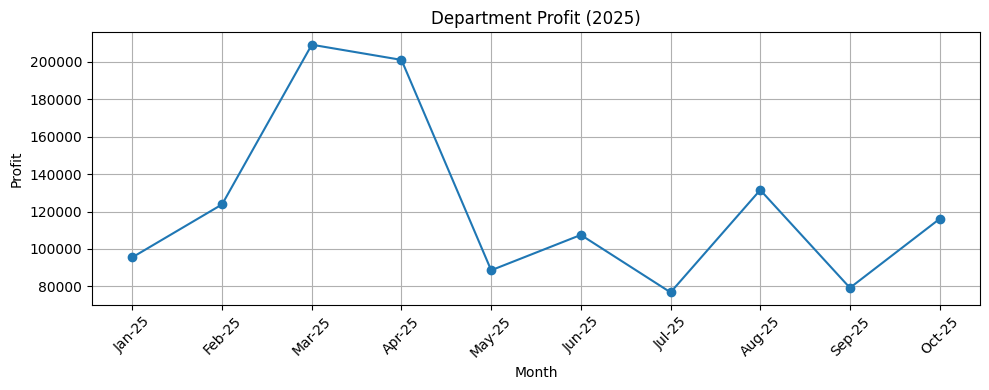

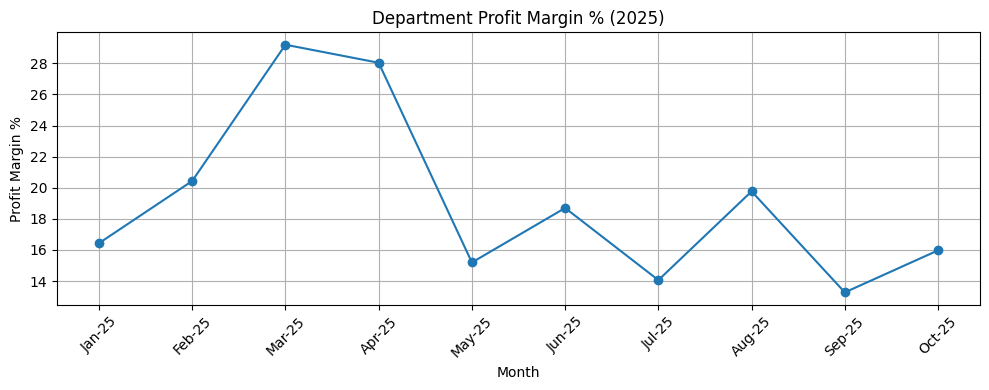

(Jan-25     95575.0
 Feb-25    123825.0
 Mar-25    209165.0
 Apr-25    201054.0
 May-25     88631.0
 Jun-25    107519.0
 Jul-25     76818.0
 Aug-25    131540.0
 Sep-25     79239.0
 Oct-25    116092.0
 dtype: float64,
 Jan-25    16.435687
 Feb-25    20.435394
 Mar-25    29.193825
 Apr-25    28.034787
 May-25    15.197516
 Jun-25    18.699802
 Jul-25    14.063538
 Aug-25    19.767669
 Sep-25    13.275177
 Oct-25    15.975033
 dtype: float64)

In [ ]:
# Cell 8: Profit and profit margin

profit = total_revenues - total_cogs - dept_expenses_total
profit_margin = (profit / total_revenues.replace(0, np.nan)) * 100

plt.figure(figsize=(10, 4))
plt.plot(months, profit.values, marker="o")
plt.title("Department Profit (2025)")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(months, profit_margin.values, marker="o")
plt.title("Department Profit Margin % (2025)")
plt.xlabel("Month")
plt.ylabel("Profit Margin %")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

profit, profit_margin


# F&B Department P&L Analysis (2025)

This notebook analyzes the 2025 actual P&L for the Food & Beverage department.

The objectives are:
- Rebuild key P&L totals (Revenues, COGS, Salaries, Operating Expenses)
- Validate calculations against the original financial report
- Visualize revenue, cost, and profit trends across the year
- Provide a clean summary table for monthly performance analysis

All business logic is based on standard F&B departmental accounting structure used in casino and hospitality operations.
